In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-dataset/blood.csv


In [117]:
import pandas as pd
import numpy as np

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

## load dataset

In [119]:
data=pd.read_csv('/kaggle/input/blood-dataset/blood.csv')

In [120]:
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [121]:
data.tail()

,Recency,Frequency,Monetary,Time,Class
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [122]:
data.shape

(748, 5)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [124]:
data.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

## data cleaning

In [125]:
data.isnull()

,Recency,Frequency,Monetary,Time,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [126]:
data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [127]:
data[data.duplicated()]

,Recency,Frequency,Monetary,Time,Class
18,2,6,1500,15,1
20,2,3,750,4,1
23,2,6,1500,16,1
32,4,10,2500,28,1
43,2,5,1250,16,0
...,...,...,...,...,...
735,23,1,250,23,0
736,23,1,250,23,0
737,23,1,250,23,0
738,23,1,250,23,0


In [128]:
data.duplicated().sum()

215

In [129]:
data.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


In [130]:
data.rename(columns={"Time":"Time(month)","Class":"Donated Blood"},inplace=True)

In [131]:
data.head()

,Recency,Frequency,Monetary,Time(month),Donated Blood
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 1 stands for Donating Blood (DB)
# 0 stands for NOT Donating Blood (NDB)


In [132]:
data["Donated Blood"].value_counts()

Donated Blood
0    570
1    178
Name: count, dtype: int64

In [133]:
data.median()

Recency             7.0
Frequency           4.0
Monetary         1000.0
Time(month)        28.0
Donated Blood       0.0
dtype: float64

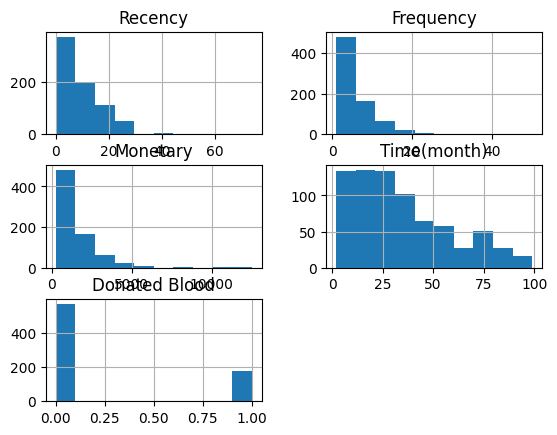

In [134]:
_=data.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

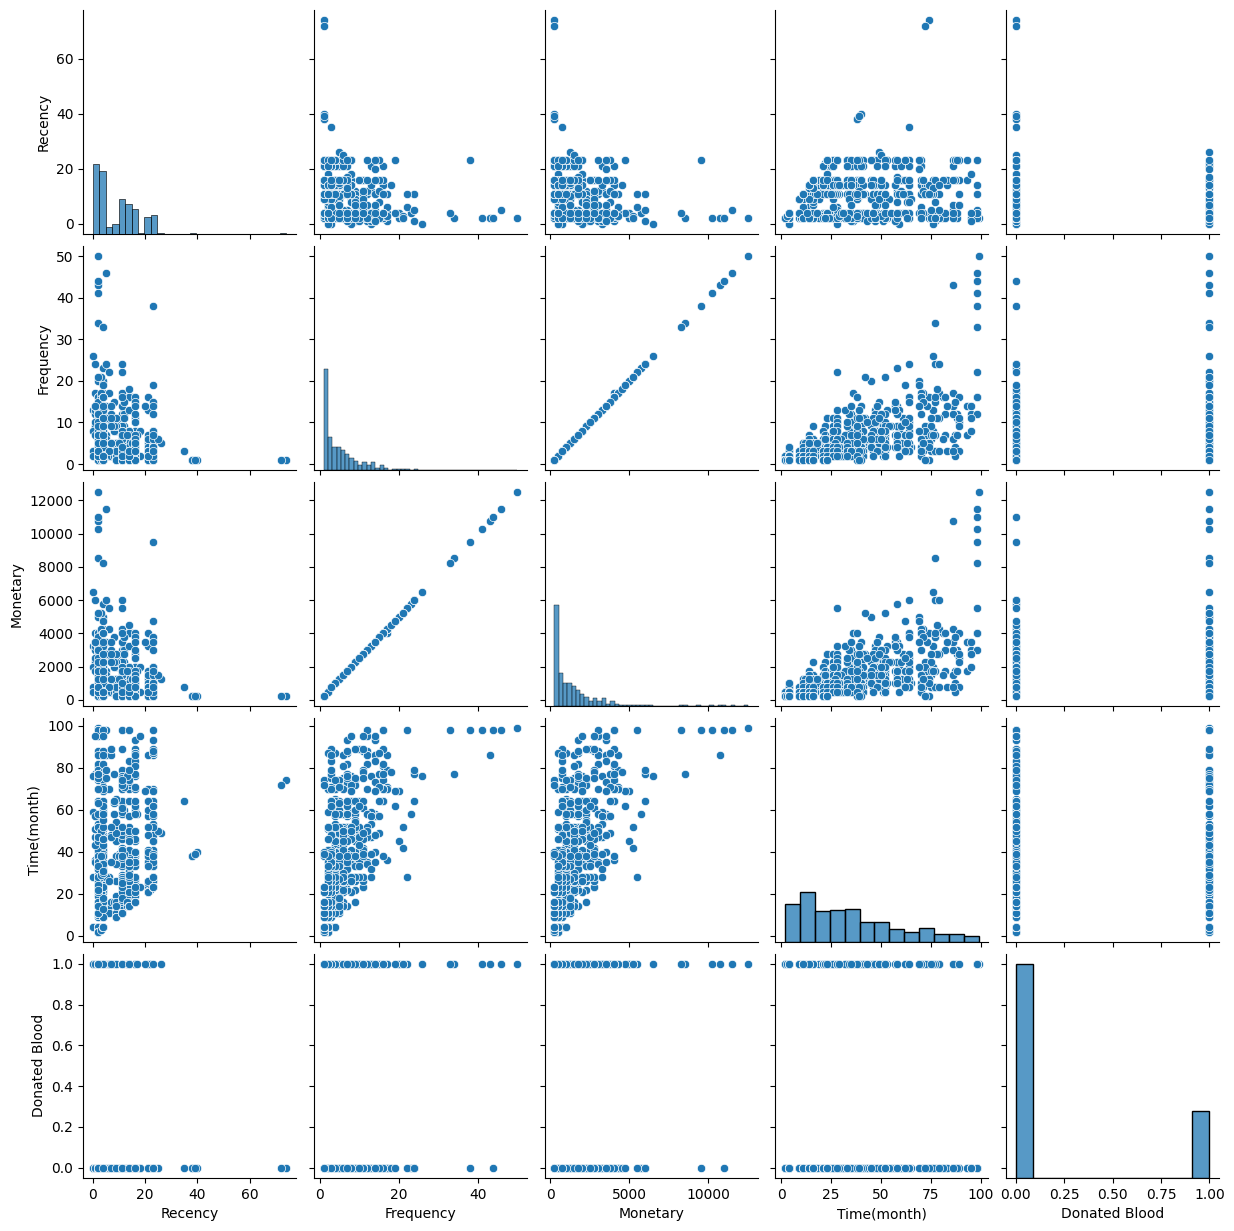

In [135]:
sns.pairplot(data,diag_kind="hist")


In [136]:
data.mean()

Recency             9.506684
Frequency           5.516043
Monetary         1378.676471
Time(month)        34.284759
Donated Blood       0.237968
dtype: float64

<Axes: >

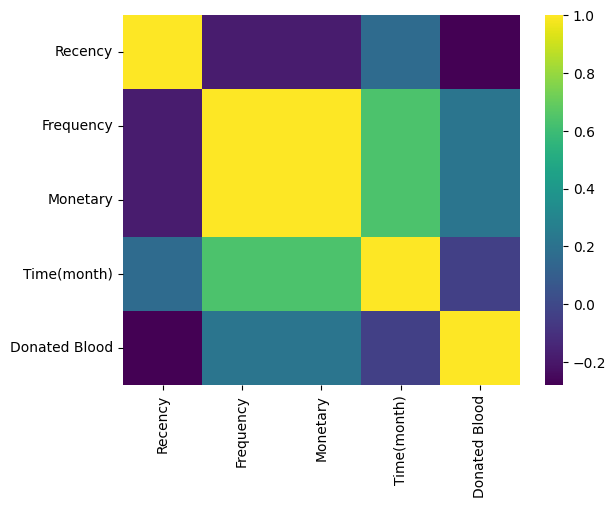

In [137]:
sns.heatmap(data.corr(),cmap='viridis')

In [138]:
x=data[['Recency', 'Frequency', 'Monetary','Time(month)']]
y=data['Donated Blood']

In [139]:
x.head()

,Recency,Frequency,Monetary,Time(month)
0,2,50,12500,99
1,0,13,3250,28
2,1,17,4000,36
3,2,20,5000,45
4,1,24,6000,77


In [140]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Donated Blood, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [142]:
x_train.head()

,Recency,Frequency,Monetary,Time(month)
666,11,1,250,11
227,4,3,750,24
121,4,5,1250,26
451,21,3,750,38
403,16,3,750,34


In [143]:
x_train.shape

(598, 4)

In [144]:
y_train.shape

(598,)

In [145]:
x_train.var()

Recency        6.143834e+01
Frequency      3.285503e+01
Monetary       2.051127e+06
Time(month)    5.849424e+02
dtype: float64

In [146]:
x_train_normed, x_test_normed = x_train.copy(), x_test.copy()


In [147]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

In [148]:
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42)

# Train the Model
logreg.fit(x_train, y_train)

# AUC Score
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7722


this project developed a predictive model with an AUC score of 0.79, demonstrating its effectiveness in distinguishing between potential blood donors and non-donors. 